In [19]:
# imports

%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

motor = 'Nabla'

In [20]:
# reading hysteresis data

hysteresisTrainTotal = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/{}/hysteresis_all_scaled_train.csv'.format(motor))['total']
hysteresisTestTotal = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/{}/hysteresis_all_scaled_test.csv'.format(motor))['total']

hysteresis = ({'train' : hysteresisTrainTotal,
               'test' : hysteresisTestTotal})

In [21]:
# reading Id Iq data

IdIqTrain = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/{}/idiq_all_scaled_train.csv'.format(motor))
IdIqTest = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/{}/idiq_all_scaled_test.csv'.format(motor))

id = ({'train' : IdIqTrain['id'],
         'test' : IdIqTest['id']})

iq = ({'train' : IdIqTrain['iq'],
         'test' : IdIqTest['iq']})

In [22]:
# reading joule data

jouleTrainTotal = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/{}/joule_all_scaled_train.csv'.format(motor))['total']
jouleTestTotal = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/{}/joule_all_scaled_test.csv'.format(motor))['total']

joule = ({'train' : jouleTrainTotal,
          'test' : jouleTestTotal})

In [23]:
# reading speed data

speedTrain = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/{}/speed_all_scaled_train.csv'.format(motor))['N']
speedTest = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/{}/speed_all_scaled_test.csv'.format(motor))['N']

speed = ({'train' : speedTrain,
          'test' : speedTest})

In [24]:
# reading Xgeom data

xgeomTrain = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/{}/xgeom_all_scaled_train.csv'.format(motor))
xgeomTest = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/{}/xgeom_all_scaled_test.csv'.format(motor))

xgeom = ({'train' : xgeomTrain,
          'test' : xgeomTest})

d1 = ({'train' : xgeomTrain['d1'],
         'test' : xgeomTest['d1']})
d2 = ({'train' : xgeomTrain['d2'],
         'test' : xgeomTest['d2']})
d3 = ({'train' : xgeomTrain['d3'],
         'test' : xgeomTest['d3']})
d4 = ({'train' : xgeomTrain['d4'],
         'test' : xgeomTest['d4']})
d5 = ({'train' : xgeomTrain['d5'],
         'test' : xgeomTest['d5']})
d6 = ({'train' : xgeomTrain['d6'],
         'test' : xgeomTest['d6']})
d7 = ({'train' : xgeomTrain['d7'],
         'test' : xgeomTest['d7']})
d8 = ({'train' : xgeomTrain['d8'],
         'test' : xgeomTest['d8']})


In [25]:
def combinedHist (name, train, test, binss = 100, sizeTrain = 20735, interval = 5, sizeTest = 4147):
    fig = plt.figure(figsize = (6, 6))
    grid = plt.GridSpec(4, 4, hspace = 0.2, wspace = 0.4)

    main_ax = fig.add_subplot(grid[:-1, 1:])

    y_hist = fig.add_subplot(grid[:-1, 0],
                            xticklabels = [],
                            sharey = main_ax)
    x_hist = fig.add_subplot(grid[-1, 1:],
                            yticklabels = [],
                            sharex = main_ax)

    main_ax.hist2d(train[0:sizeTrain:interval], test[0:sizeTest],
                bins = binss, cmap = 'Blues')

    x_hist.hist(train[0:sizeTrain:interval], histtype = 'stepfilled', bins = binss,
                orientation = 'vertical', color = 'green', alpha = 0.3)
    x_hist.invert_yaxis()

    y_hist.hist(test[0:sizeTest], histtype = 'stepfilled', bins = binss,
                orientation = 'horizontal', color = 'green', alpha = 0.3)
    y_hist.invert_xaxis()

    fig.suptitle("{} - Train and Test Comparison".format(name), size = 18)
    fig.supxlabel('Train')
    fig.supylabel('Test')

In [26]:
def hist2d (name, train, test, binss = 100, sizeTrain = 20735, interval = 5, sizeTest = 4147):
    plt.hist2d(train[0:sizeTrain:interval], test[0:sizeTest], bins = binss)

    plt.title('{} - Train and Test'.format(name))

    plt.colorbar()

    plt.xlabel('Train')
    plt.ylabel('Test')

In [27]:
def histJointPlot (data):
    sns.jointplot(data = data, x = "train", y = "test", kind = 'kde', color = 'pink')

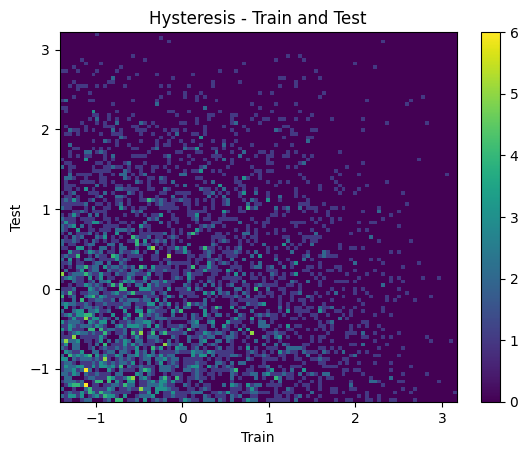

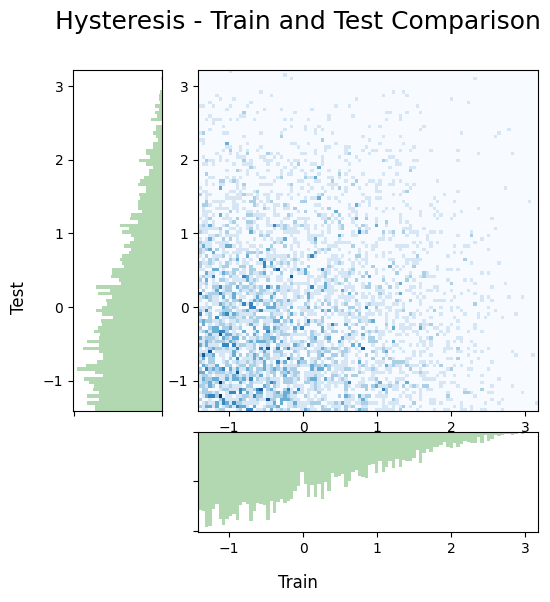

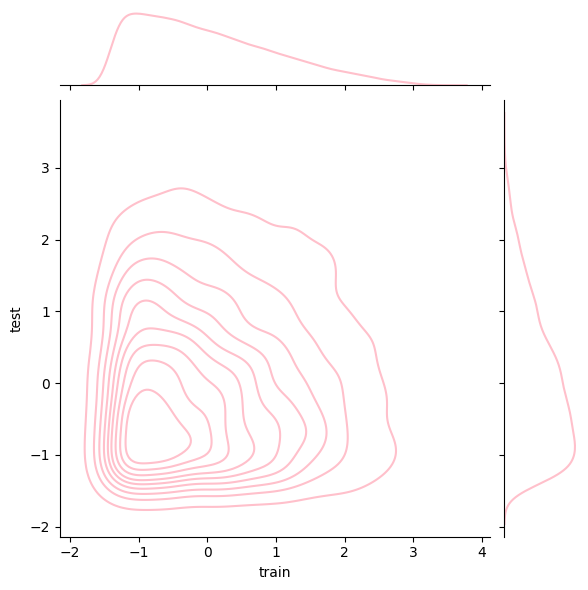

In [28]:
hist2d("Hysteresis", hysteresis['train'], hysteresis['test'])
combinedHist("Hysteresis", hysteresis['train'], hysteresis['test'])
histJointPlot(hysteresis)
plt.show()

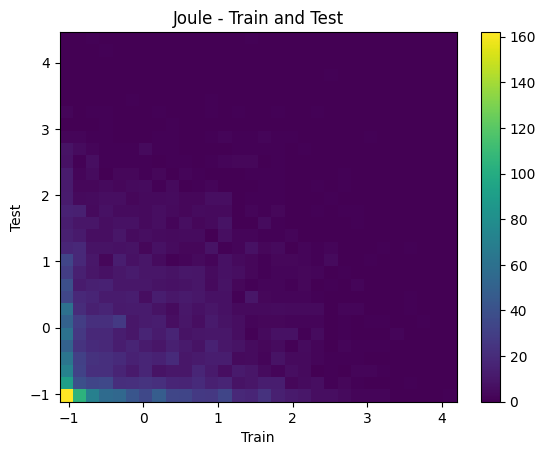

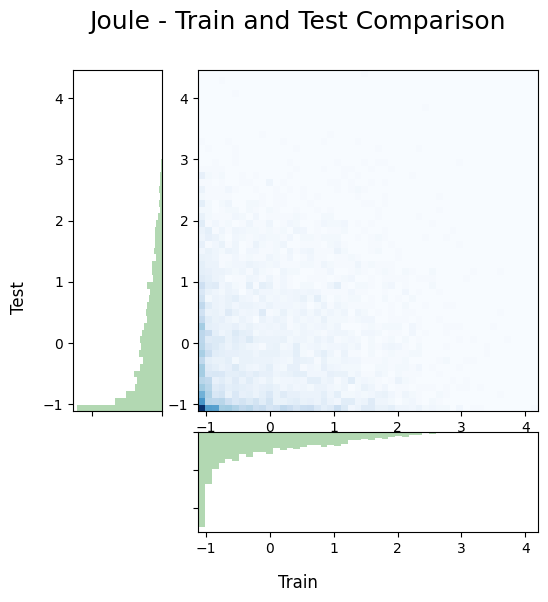

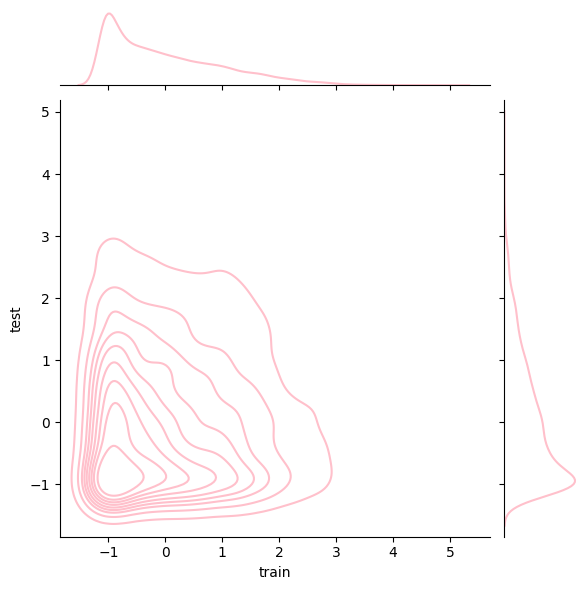

In [29]:
hist2d("Joule", joule['train'], joule['test'], 30)
combinedHist("Joule", joule['train'], joule['test'], 50)
histJointPlot(joule)
plt.show()

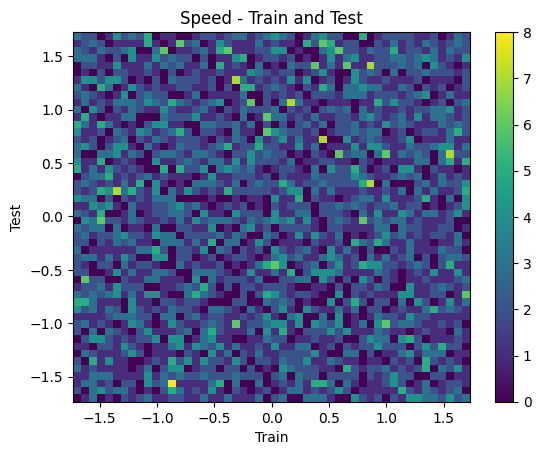

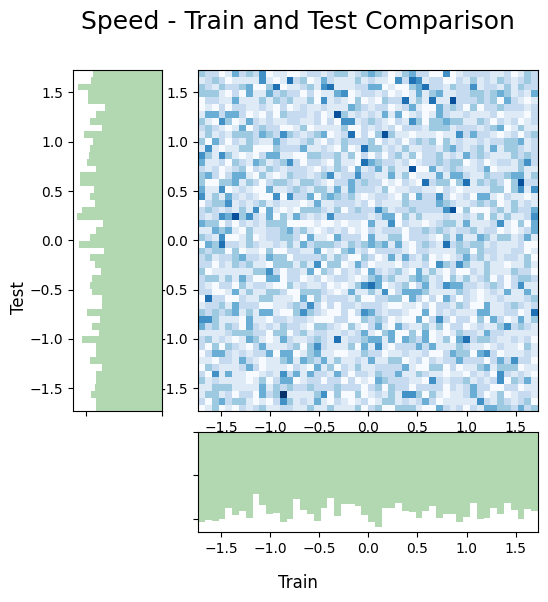

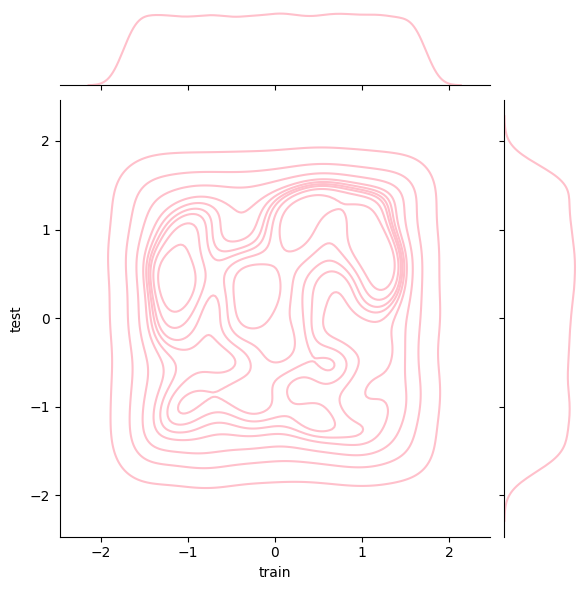

In [30]:
hist2d("Speed", speed['train'], speed['test'], 50, 23040, 5, 4608)
combinedHist("Speed", speed['train'], speed['test'], 50, 23040, 5, 4608)
histJointPlot(speed)
plt.show()

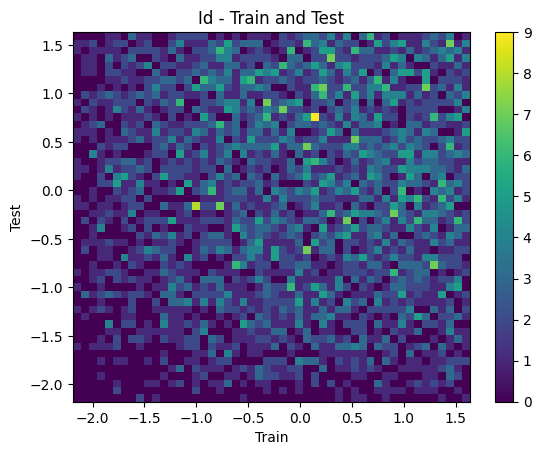

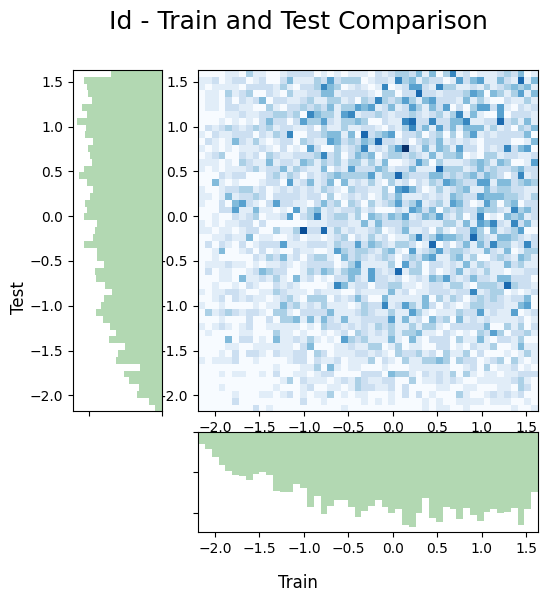

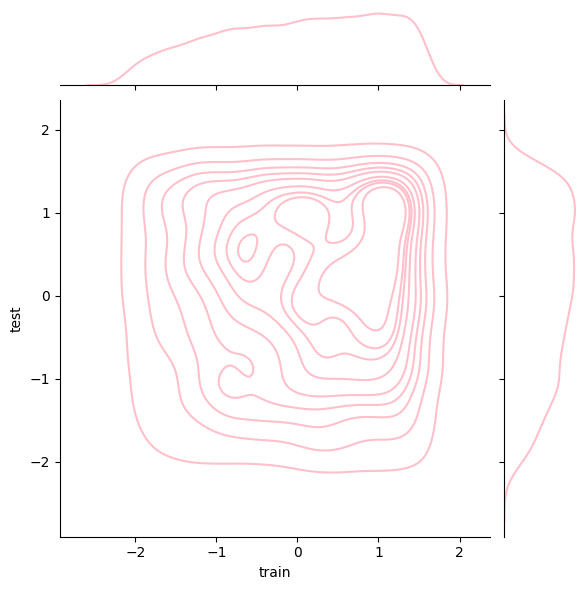

In [31]:
hist2d("Id", id['train'], id['test'], 50)
combinedHist("Id", id['train'], id['test'], 50)
histJointPlot(id)
plt.show()

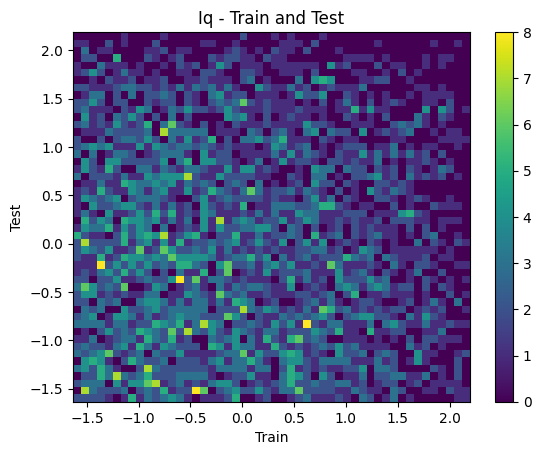

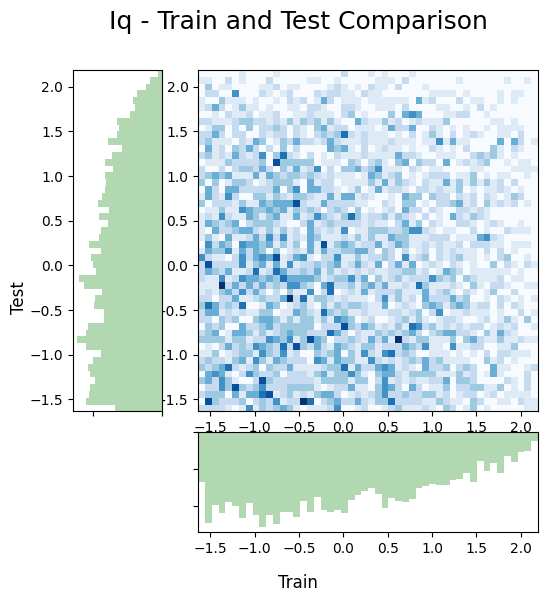

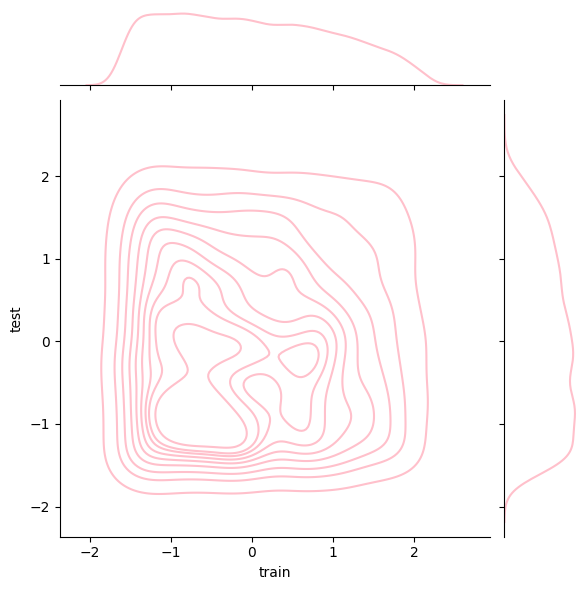

In [32]:
hist2d("Iq", iq['train'], iq['test'], 50)
combinedHist("Iq", iq['train'], iq['test'], 50)
histJointPlot(iq)
plt.show()

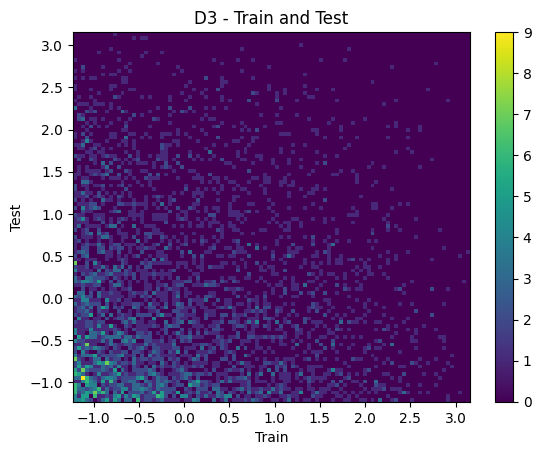

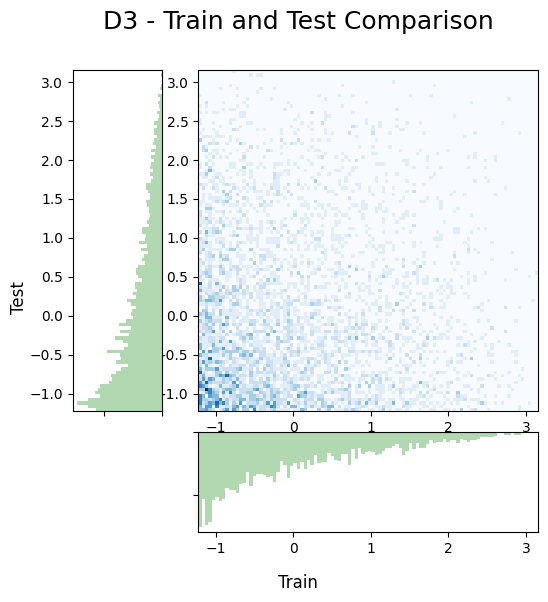

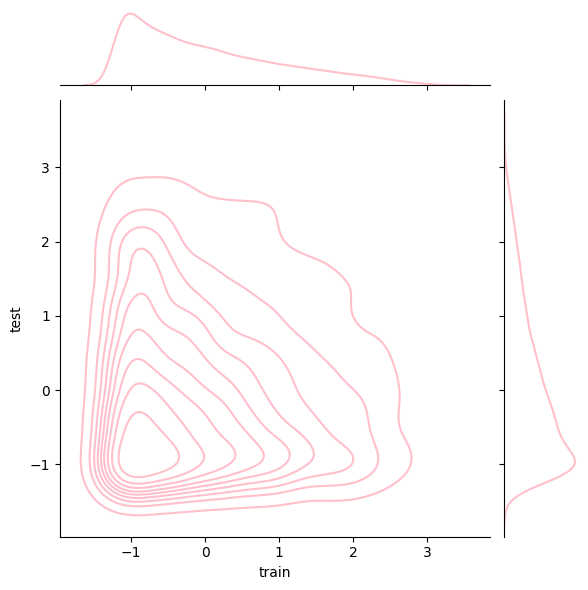

In [33]:
hist2d("D3", d3['train'], d3['test'])
combinedHist("D3", d3['train'], d3['test'])
histJointPlot(d3)
plt.show()